In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import random_center_initializer
from sklearn.decomposition import PCA

In [60]:
csv_file_path = 'C:\\Users\\yuko_\\kaggle\\advertising.csv'

In [61]:
df = pd.read_csv(csv_file_path)

In [62]:
# データの先頭5行を表示
print(df.head())
# データの基本情報
print(df.info())
# 統計的要約
print(df.describe())

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

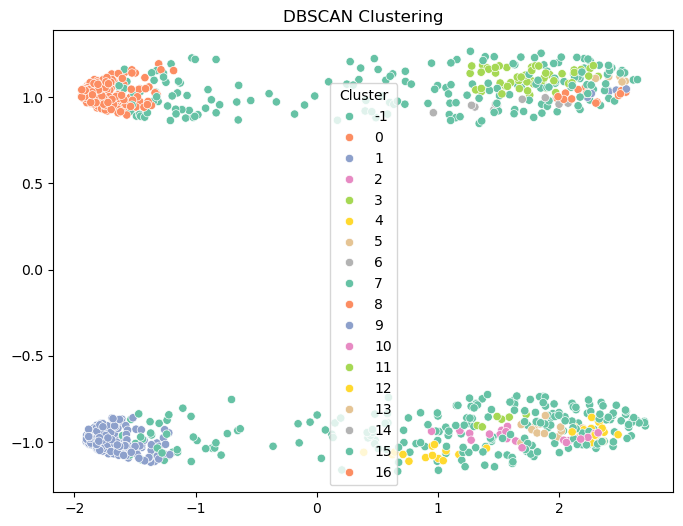

In [63]:
# データを標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # 数値データを対象

# 4. DBSCANの実行
# epsは近接領域の半径、min_samplesはクラスタに含まれる最小のデータ点数
db = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = db.fit_predict(scaled_data)

# 5. クラスタリング結果の可視化（PCAで次元削減して2次元にする）
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('DBSCAN Clustering')
plt.show()

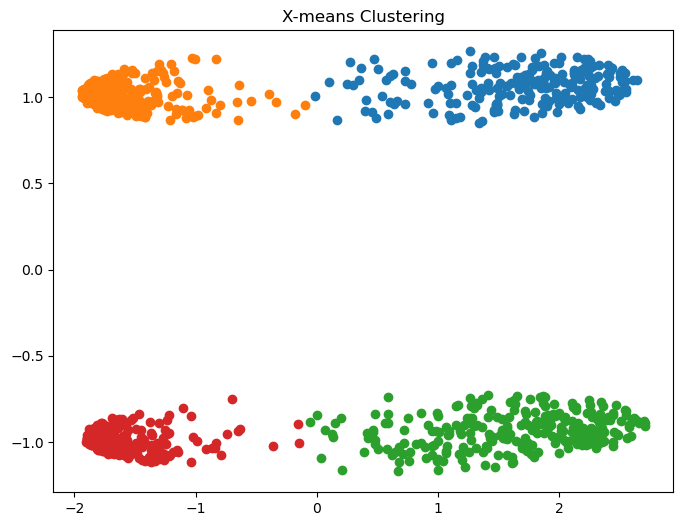

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.xmeans import xmeans  # X-meansをインポート
from pyclustering.cluster.center_initializer import random_center_initializer  # 初期中心のインポート
from sklearn.decomposition import PCA

# 1. データの読み込み（パスを実際のものに修正）
csv_file_path = 'C:\\Users\\yuko_\\kaggle\\advertising.csv'
df = pd.read_csv(csv_file_path)

# 2. 必要な前処理（欠損値の削除など）
df = df.dropna()

# 3. データを標準化（X-meansでも標準化が推奨されます）
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # 数値データのみ

# 4. X-meansクラスタリングの実行
# 初期中心点をランダムに生成する
initial_centers = random_center_initializer(scaled_data, 2).initialize()  # ここで初期中心を定義

# X-meansのインスタンスを作成（最小クラスタ数と最大クラスタ数）
xmeans_instance = xmeans(scaled_data, initial_centers, kmax=10)  # X-meansインスタンスを作成

# クラスタリングの実行
xmeans_instance.process()

# 得られたクラスタリング結果を取得
clusters = xmeans_instance.get_clusters()

# 5. 結果の可視化（PCAで次元削減して2次元にする）
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 各クラスタのデータをリストにまとめてプロット
plt.figure(figsize=(8, 6))
for cluster in clusters:
    cluster_points = pca_data[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])

plt.title('X-means Clustering')
plt.show()
